# Part I - Fordgo Bike Trip Dataset
## by Matthew Chan

# Introduction

The following dataset is about the ford gobike dataset, it contains the trips of its app users for the month of February.


# Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the dataset 
fordbike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# defining a function to explore and summarize datasets

def summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the data type, # of null rows and unique rows of a given dataframe
    
    Args: 
        A dataframe of n_rows and n_columns
    Returns:
        A dataframe of 4 columns [data_type, non-null-rows, unique_rows, missing_rows]
    """
    concat = pd.concat(
        [df.dtypes.to_frame(), df.count().to_frame(), df.nunique(), df.isnull().sum()], axis=1
    )
    concat.columns = ['data_type', 'non-null-rows', 'unique_rows', 'missing_rows']
    return concat

In [4]:
# creating a new copy so we can revert to original data if needed after all the cleaning
bike_df = fordbike.copy()

# summarizing the dataset
summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,183412,4752,0
start_time,object,183412,183401,0
end_time,object,183412,183397,0
start_station_id,float64,183215,329,197
start_station_name,object,183215,329,197
start_station_latitude,float64,183412,334,0
start_station_longitude,float64,183412,335,0
end_station_id,float64,183215,329,197
end_station_name,object,183215,329,197
end_station_latitude,float64,183412,335,0


## Cleaning and transforming the Dataset
We are going to perform the following data cleaning/preparations on the dataset:
1. Assigning the correct/appropriate datatypes
2. Adding an 'age' column to denote users age
3. Editing the datetime format of certain columns for readability and easier analysis

### Casting into appropriate datatypes

In [5]:
# casting the following variables into their correct/appropriate datatypes
bike_df = (
    bike_df
    .astype({'start_time': 'datetime64[ns]',
             'end_time': 'datetime64[ns]',
             'start_station_id': 'str',
             'end_station_id': 'str',
             'bike_id': 'str',
             'member_gender': 'category',
             'user_type': 'category'})
)

### Creating new columns based on the start_time 

In [6]:
# adding age of riders 'age' column into dataset
# adding new columns - 'date, hour, day and month' for datetime formats
bike_df = (
    bike_df
    .assign(age=lambda a: 2022-a.member_birth_year,
            start_date=lambda sd: sd.start_time.dt.strftime('%Y-%m-%d'),
            start_hour=lambda x: x.start_time.dt.strftime('%H'),
            start_day=lambda x: x.start_time.dt.strftime('%A'),
            start_month=lambda x: x.start_time.dt.strftime('%B'))
)

summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,183412,4752,0
start_time,datetime64[ns],183412,183401,0
end_time,datetime64[ns],183412,183397,0
start_station_id,object,183412,330,0
start_station_name,object,183215,329,197
start_station_latitude,float64,183412,334,0
start_station_longitude,float64,183412,335,0
end_station_id,object,183412,330,0
end_station_name,object,183215,329,197
end_station_latitude,float64,183412,335,0


In [7]:
# seems like there are missing rows in our age dataset, we will remove these columns
bike_df[bike_df['age'].isnull()].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour,start_day,start_month
67099,684,2019-02-20 08:11:59.918,2019-02-20 08:23:24.379,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,48,Subscriber,NaN,NaN,No,NaN,2019-02-20,08,Wednesday,February
141146,6010,2019-02-07 16:44:20.218,2019-02-07 18:24:30.523,13.0,Commercial St at Montgomery St,37.794231,-122.402923,368.0,Myrtle St at Polk St,37.785434,...,2351,Customer,NaN,NaN,No,NaN,2019-02-07,16,Thursday,February
35854,123,2019-02-23 17:40:47.149,2019-02-23 17:42:50.315,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,200.0,2nd Ave at E 18th St,37.800214,...,4682,Subscriber,NaN,NaN,No,NaN,2019-02-23,17,Saturday,February
173009,179,2019-02-03 13:55:55.643,2019-02-03 13:58:54.752,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,169.0,Bushrod Park,37.846516,...,662,Customer,NaN,NaN,No,NaN,2019-02-03,13,Sunday,February
127325,167,2019-02-10 16:15:53.516,2019-02-10 16:18:40.527,345.0,Hubbell St at 16th St,37.766483,-122.398279,114.0,Rhode Island St at 17th St,37.764478,...,5522,Subscriber,NaN,NaN,No,NaN,2019-02-10,16,Sunday,February


In [8]:
# removing null/na numbers of members without age
bike_df = bike_df.dropna(subset=['age'])
# casting age into appropriate datatype (int)
bike_df = bike_df.astype({'age': 'int32'})

summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,175147,4432,0
start_time,datetime64[ns],175147,175136,0
end_time,datetime64[ns],175147,175134,0
start_station_id,object,175147,330,0
start_station_name,object,174952,329,195
start_station_latitude,float64,175147,334,0
start_station_longitude,float64,175147,335,0
end_station_id,object,175147,330,0
end_station_name,object,174952,329,195
end_station_latitude,float64,175147,335,0


### Structure of the dataset
> Each dataset represents a unique, single trip by a user in the month of February. It contains the start, end, duration and other spatial data of the trip. There are a total of 16 variables, with around 183k records. These records can be broadly categorized into 3 main groups:

> 1. Timeseries data - e.g, duration_sec, start/end_time, birth_year 
> 2. Spatial data - e.g, start/end_station_longitude/latitude
> 3. Member information - gender, age
> 4. Derived features - start_date/hour/day

### What is/are the main feature(s) of interest in your dataset?

> We are interesting in understanding the usage patterns of riders, which involves their ride characteristics (e.g, trip durations) alongside the profile of a user (e.g, age, gender, user_type)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end time variables will be useful in understanding the usage patterns. Also, start_day/month allows us to understand which days are most popular with users. The member information like user type, gender and age will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

In [9]:
# overview of dataset
bike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour,start_day,start_month
18613,618,2019-02-26 18:10:51.600,2019-02-26 18:21:10.171,81.0,Berry St at 4th St,37.775880,-122.393170,126.0,Esprit Park,37.761634,...,567,Customer,1991.0,Male,No,31,2019-02-26,18,Tuesday,February
135259,472,2019-02-08 14:16:20.930,2019-02-08 14:24:13.784,27.0,Beale St at Harrison St,37.788059,-122.391865,81.0,Berry St at 4th St,37.775880,...,5529,Subscriber,1982.0,Male,No,40,2019-02-08,14,Friday,February
47066,535,2019-02-22 09:04:38.510,2019-02-22 09:13:33.526,130.0,22nd St Caltrain Station,37.757288,-122.392051,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,4332,Subscriber,1983.0,Female,No,39,2019-02-22,09,Friday,February
42025,1716,2019-02-22 17:35:46.618,2019-02-22 18:04:23.168,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,77.0,11th St at Natoma St,37.773507,...,5242,Subscriber,1952.0,Female,No,70,2019-02-22,17,Friday,February
124256,479,2019-02-11 08:42:07.088,2019-02-11 08:50:06.996,31.0,Raymond Kimbell Playground,37.783813,-122.434559,19.0,Post St at Kearny St,37.788975,...,4848,Subscriber,1994.0,Male,No,28,2019-02-11,08,Monday,February


# Univariate Exploration

In [97]:
# define a default chart size for all visualizations
plt.rcParams["figure.figsize"] = (9,7)
# seaborn plot size
plt.figure(figsize=[9, 7])

## Visualization 1: What is the distribution of rides by user_type?

Text(0.5,1,'Distribution of rides by usertype')

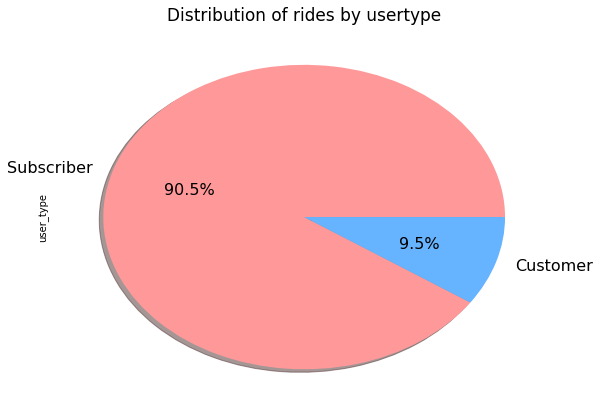

In [11]:
# segmenting out our dataset for the pie plot
bike_df.user_type.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=['#ff9999','#66b3ff'], fontsize=16)
# naming the line chart
plt.title("Distribution of rides by usertype", fontsize=17)

As observed, a significant majority of rides were completed by subscribers (90.5%) as compared to customers at 9.5%.

## Visualization 2: What is the trip distribution over the hours of a day?

Text(0,0.5,'Frequency')

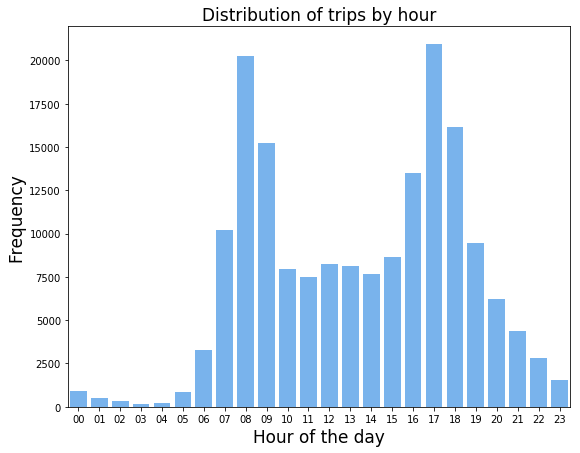

In [28]:
trip_hour_distribution = sns.countplot(data=bike_df, x='start_hour', color='#66b3ff')

# set title of plot
trip_hour_distribution.axes.set_title('Distribution of trips by hour', fontsize=17)
# set x_label of plot
trip_hour_distribution.axes.set_xlabel('Hour of the day', fontsize=17)
# set y_label of plot
trip_hour_distribution.axes.set_ylabel('Frequency', fontsize=17)

Trips peaked around 8am and 5pm, which seems to be during the rush hour periods.

## Visualization 3: What is the trip distribution over days of the week?

Text(0,0.5,'Frequency')

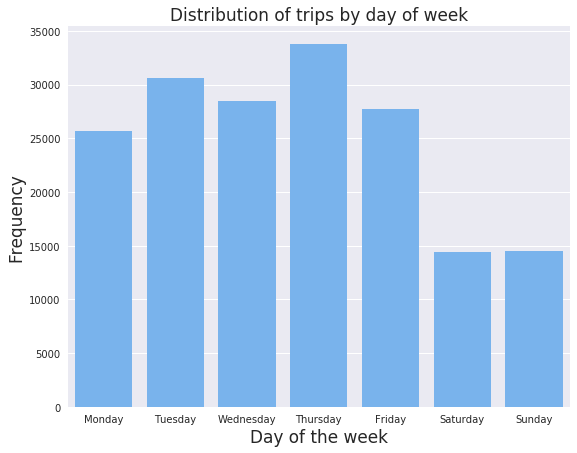

In [171]:
# defining days of the week for our chart
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# declaring the day list as ordered data
days_of_week_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
bike_df = bike_df.astype({'start_day': days_of_week_cat})

# defining the countplot
trip_day_distribution = sns.countplot(data=bike_df, x='start_day', color='#66b3ff')

# set title of plot
trip_day_distribution.axes.set_title('Distribution of trips by day of week', fontsize=17)
# set x_label of plot
trip_day_distribution.axes.set_xlabel('Day of the week', fontsize=17)
# set y_label of plot
trip_day_distribution.axes.set_ylabel('Frequency', fontsize=17)

Trips typically happened more during the weekdays rather than the weekends.

## Visualization 4: What is the trip distribution of days in the month of February?

Text(0,0.5,'Frequency')

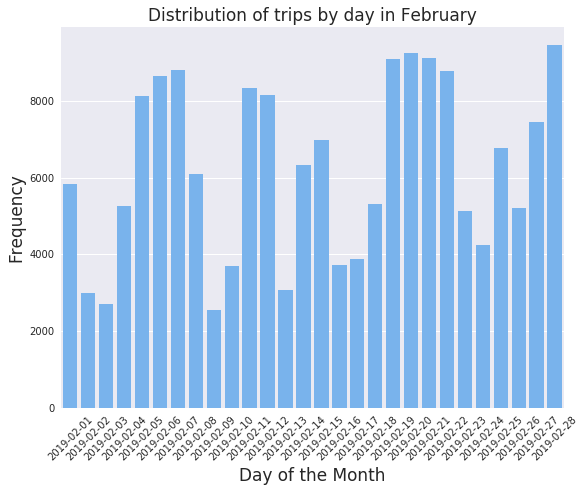

In [91]:
# defining days of the month for our chart
days_of_month = bike_df.start_date.unique().tolist().reverse()
days_of_month_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_month)
bike_df = bike_df.astype({'start_date': days_of_month_cat})

# defining the countplot
trip_month_distribution = sns.countplot(data=bike_df, x='start_date', color='#66b3ff')
# rotation x-axis for clarity
plt.xticks(rotation=45)
# set title of plot
trip_month_distribution.axes.set_title('Distribution of trips by day in February', fontsize=17)
# set x_label of plot
trip_month_distribution.axes.set_xlabel('Day of the Month', fontsize=17)
# set y_label of plot
trip_month_distribution.axes.set_ylabel('Frequency', fontsize=17)


Dips in the trip frequency throughout the month seems to coincide with the weekends.

## Visualization 5: What is the distribution of trips by member age?

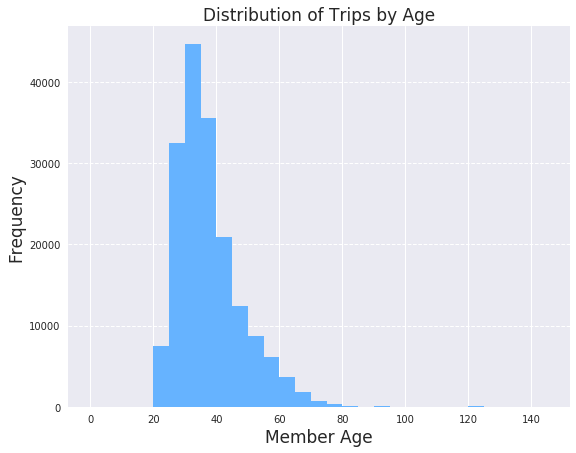

In [93]:
bins = np.arange(0, bike_df['age'].max()+5, 5)
plt.hist(data=bike_df, x='age', bins=bins, color='#66b3ff')

# set title of the histogram
plt.title('Distribution of Trips by Age', fontsize=17)
# set x_label of plot
plt.xlabel('Member Age', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

Fewer individuals in their 20s, but interestingly there seems to be datapoints for users at age > 100. Might be an error.

## Visualization 6: What is the distribution of trip by duration (seconds)?

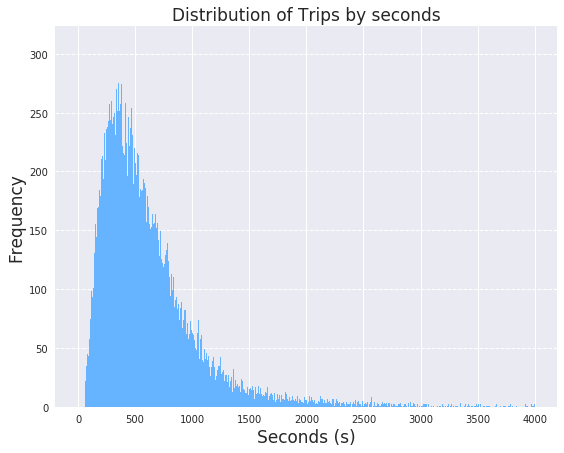

In [96]:
bins = np.arange(0, 4000, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=bike_df, x='duration_sec', bins=bins, color='#66b3ff')

# set title of the histogram
plt.title('Distribution of Trips by seconds', fontsize=17)
# set x_label of plot
plt.xlabel('Seconds (s)', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

From the histogram, it seems that the distribution of trips duration is right skewed. This tells us most trips are concentrated around the 500-700 seconds duration (8~11 minutes long). This might indicate that individuals typically use the bikes for specific use cases rather than leisure.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trips typically peaked around 8am and 5pm, which seems to be the rush hour time period for working/schooling individuals. There were also significantly more subscribers (90+%) than customers in our dataset. 

> Most rides happened during the weekdays (Mon-Fri) and were short in duration (< 10 minutes) per trip. Also, a large proportion of users age were around late 30s to early 40s.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration seems to have some extreme outliers that skewed the chart, this is something that I will attempt to clean in the bivariate exploration stage when the issue becomes more apparent.

# Bivariate Exploration

## Visualization 7: What is the age distribution of bike users membership type?

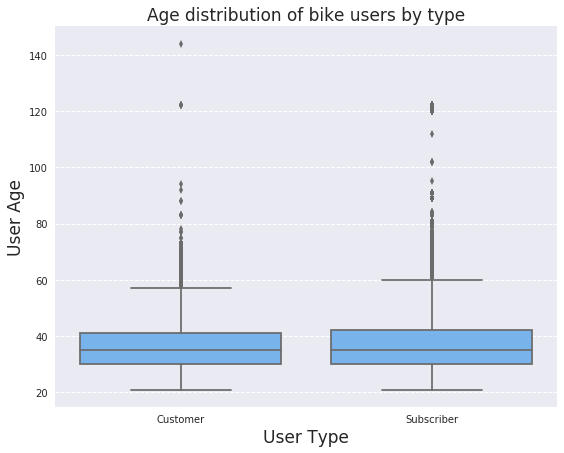

In [95]:
sns.boxplot(data=bike_df, x='user_type', y='age', color='#66b3ff')

# set title of the histogram
plt.title('Age distribution of bike users by type', fontsize=17)
# set x_label of plot
plt.xlabel('User Type', fontsize=17)
# set y_label of plot
plt.ylabel('User Age', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

The median user age and age distribution between Customer and Subscribers are quite similar.

## Visualization 8:  Average trip duration by day of the week

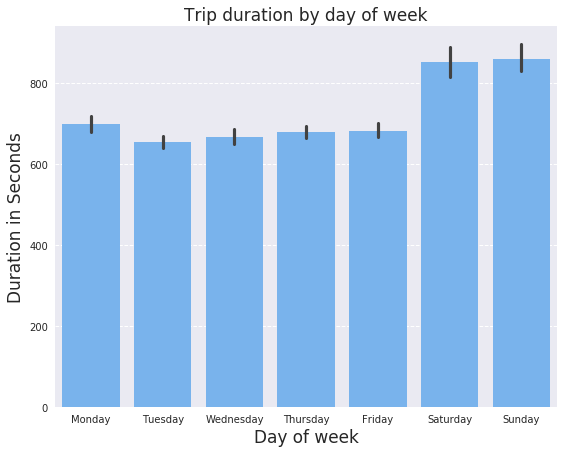

In [100]:
sns.barplot(data=bike_df, x='start_day', y='duration_sec', color='#66b3ff')

# set title of the barplot
plt.title('Trip duration by day of week', fontsize=17)
# set x_label of plot
plt.xlabel('Day of week', fontsize=17)
# set y_label of plot
plt.ylabel('Duration in Seconds', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

Even though more trips happened during weekdays, the duration of each trip seems to be longer during the weekends. This is very interesting insights.

## Visualization 9: Average trip duration by Gender

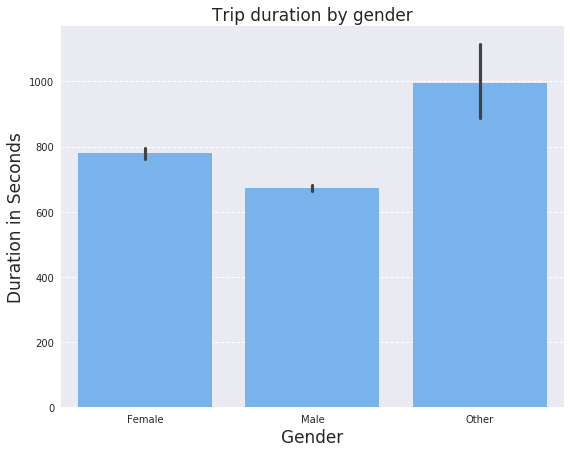

In [104]:
sns.barplot(data=bike_df, x='member_gender', y='duration_sec', color='#66b3ff')

# set title of the barplot
plt.title('Trip duration by gender', fontsize=17)
# set x_label of plot
plt.xlabel('Gender', fontsize=17)
# set y_label of plot
plt.ylabel('Duration in Seconds', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 10: Frequency of trips between user types by hour

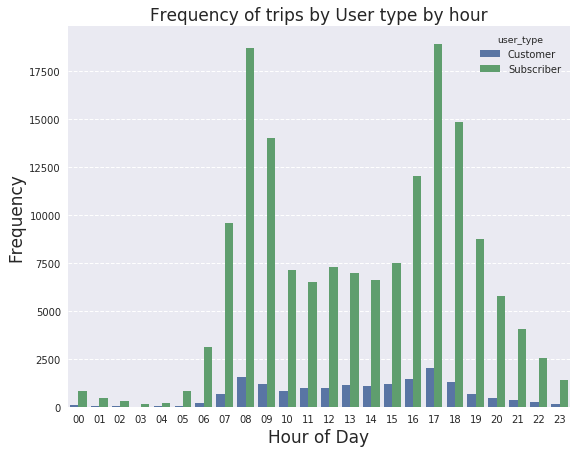

In [110]:
sns.countplot(data=bike_df, x='start_hour', hue='user_type')

# set title of the barplot
plt.title('Frequency of trips by User type by hour', fontsize=17)
# set x_label of plot
plt.xlabel('Hour of Day', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 11: Frequency of trips between user types by day

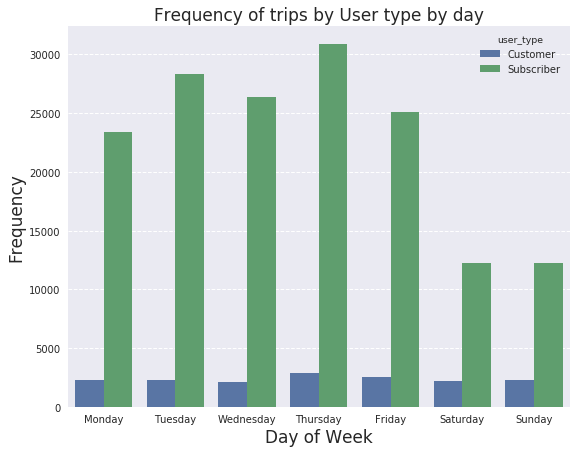

In [111]:
sns.countplot(data=bike_df, x='start_day', hue='user_type')

# set title of the barplot
plt.title('Frequency of trips by User type by day', fontsize=17)
# set x_label of plot
plt.xlabel('Day of Week', fontsize=17)
# set y_label of plot
plt.ylabel('Frequency', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 12: Distribution of users' age by Day of the week

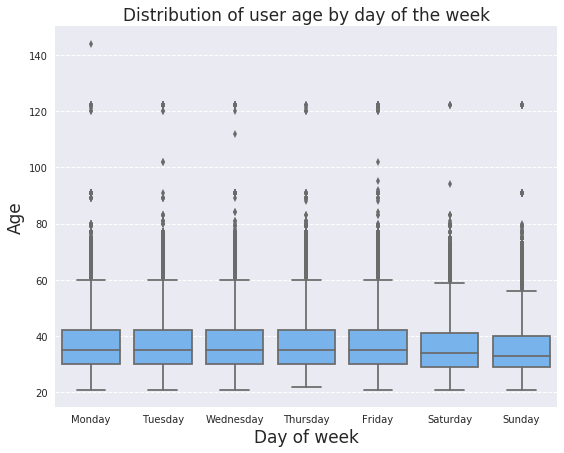

In [113]:
sns.boxplot(data=bike_df, x='start_day', y='age', color='#66b3ff')

# set title of the barplot
plt.title('Distribution of user age by day of the week', fontsize=17)
# set x_label of plot
plt.xlabel('Day of week', fontsize=17)
# set y_label of plot
plt.ylabel('Age', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

## Visualization 13: Distribution of trip durations by user type

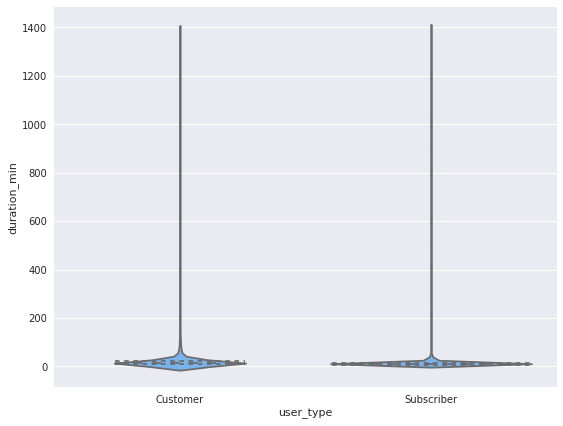

In [130]:
# creating a minute column
bike_df['duration_min'] = bike_df['duration_sec']/60

# trying to create a violin plot of distribution by minute
sns.violinplot(data=bike_df, x='user_type', y='duration_min', color='#66b3ff', inner='quartile')

The duration (in minutes) seems to be extremely skewed by outliers, we will attempt to remove it in the next step.

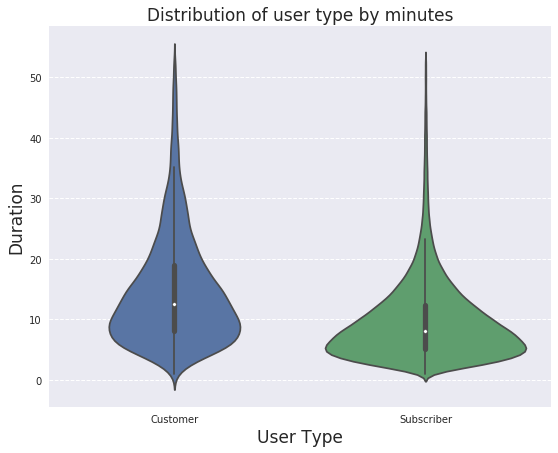

In [132]:
# we partition the distribution up till the 99th quantile, allowing us to filter out all the extreme outliers
q = bike_df['duration_min'].quantile(0.99)

# filtering out for extreme outliers
duration_outliers_removed = bike_df[bike_df['duration_min'] < q]

# creating our violin plot
sns.violinplot(data=duration_outliers_removed, x='user_type', y='duration_min')

# set title of the barplot
plt.title('Distribution of user type by minutes', fontsize=17)
# set x_label of plot
plt.xlabel('User Type', fontsize=17)
# set y_label of plot
plt.ylabel('Duration', fontsize=17)
# add gridlines
plt.grid(axis='y', linestyle='--')

After plotting our distribution, we can identify the following:

1. Customers had a higher median ride duration as compared to subscribers (as denoted by the white dot in our violinplot).

2. As the "width" of the violin plot represents the kernel density estimation of our dataset, we can conclude that Subscribers have a higher probability of taking shorter trips - as denoted by the thicker sections around the 5min duration range while Customers have a higher probability of taking trips closer to that of 10 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscription use is far higher than customer usage. Customers and subscribers have quite different riding habits and patterns. Most trips on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon) were made by subscribers because they use the bike sharing system for commuting, whereas customers typically ride for fun in the afternoon or early evening on weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It's interesting to note that subscribers tend to ride much more quickly and for shorter distances than typical customers. Additionally, subscribers used their bikes the most on weekdays rather than weekends - which signifies that they might be using it for work/school commute rather than for leisure.

## Multivariate Exploration

## Visualization 14: Average trip duration in days of the week between user types

Text(0,0.5,'Trip Duration (min)')

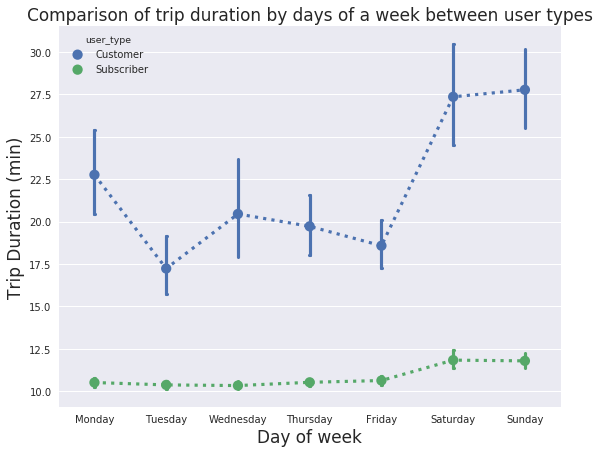

In [143]:
# creating our pointplot
sns.pointplot(data=bike_df, x='start_day', y='duration_min', hue='user_type', capsize=0.01, linestyles=":")

# set title of the barplot
plt.title('Comparison of trip duration by days of a week between user types', fontsize=17)
# set x_label of plot
plt.xlabel('Day of week', fontsize=17)
# set y_label of plot
plt.ylabel('Trip Duration (min)', fontsize=17)

As observed from the point plot, in general:
1. Customers took longer trips as compared to Subscribers
2. There is an increase (though more significant in Customers) on increase in trip duration during the weekends
3. The error bars give us an insight into the measure of central tendency between both user types, whereby customers typically have a much wider spread in trip duration - which is unlike the Subscribers who had a much more concentrated data spread, indicating that users are more likely to have a trip duration close to the median. 

This might be due to the terms of bike duration per trip (e.g, Subscribers have free trips for the first xx minutes, thereafter incurring additional charges after the daily free trip duration.)

## Visualization 15: Hourly usage between user types across days of the week

In [154]:
# defining a function to transform our dataset
def heatmap_transform(df: pd.DataFrame, target:str) -> pd.DataFrame:
    """
    Returns a pivot table of frequency count per day, by the hour
    
    Args: 
        df - A dataframe of n_rows and n_columns
        target - user type we are interested in filtering for
    Returns:
        A pivot table
    """
    
    transformed_df = (
        df
        # filter out for given target argument
        .query(f'user_type == "{target}"')
        .groupby(['start_day', 'start_hour'])
        .size()
        .reset_index(name='count')
        .pivot(index='start_day', columns='start_hour', values='count')
        .fillna(0)
    )
    
    return transformed_df

In [156]:
cust_count = heatmap_transform(bike_df, 'Customer')
subs_count = heatmap_transform(bike_df, 'Subscriber')

# sample of transformed pivot table
subs_count

start_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Monday,86,43,39,20,37,124,556,1545,2966,2062,...,784,1047,1782,2997,2193,1331,861,561,346,172
Tuesday,77,51,31,17,30,169,656,2061,3929,3043,...,968,1072,2018,3656,2919,1543,1045,622,325,164
Wednesday,75,43,29,14,25,152,530,1707,3332,2416,...,859,982,1960,3500,2836,1682,1069,815,473,214
Thursday,109,41,26,19,40,165,661,2121,4167,2569,...,1008,1241,2357,4065,3300,1800,1282,819,489,277
Friday,131,77,55,28,40,138,578,1822,3583,2726,...,786,1089,1862,2766,2071,1109,621,466,430,256
Saturday,187,145,66,22,19,25,88,188,442,699,...,1076,981,917,930,711,592,395,363,252,201
Sunday,137,81,72,33,19,26,50,137,289,519,...,1104,1067,1125,980,825,691,492,415,252,133


Text(60,0.5,'Hour of day')

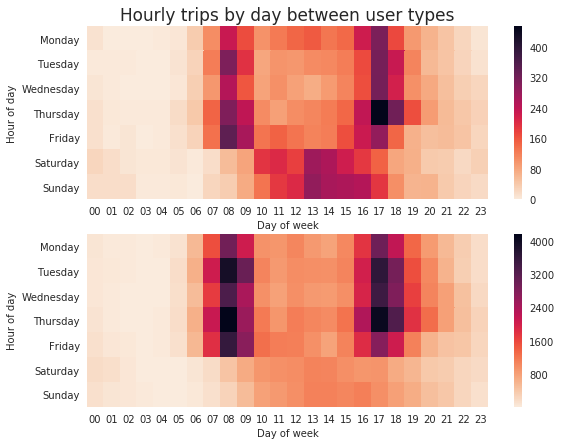

In [170]:
# defining subplot 1
plt.subplot(2,1,1)
sns.heatmap(cust_count, cmap='rocket_r')
# set x_label of plot 1
plt.xlabel('Day of week', fontsize=10)
# set y_label of plot 1
plt.ylabel('Hour of day', fontsize=10)

# set title of the barplot
plt.title('Hourly trips by day between user types', fontsize='17')

# defining subplot 2
plt.subplot(2,1,2)
sns.heatmap(subs_count, cmap='rocket_r')
# set x_label of plot 2
plt.xlabel('Day of week', fontsize=10)
# set y_label of plot 2
plt.ylabel('Hour of day', fontsize=10)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between the various variables plotted is seen collectively and information is displayed simultaneously, strengthening some of the patterns identified in the preceding bivariate investigation as well as in the univariate research. Subscribers' efficient/short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. Customers clearly utilize the bike sharing system considerably differently than subscribers, frequently on weekends and in the afternoons, likely for leisure or city tours, as seen by the more flexible and lax pattern of their usage.

### Were there any interesting or surprising interactions between features?

> When all the interactions between the features are considered together, they all complement one another and make sense, so there aren't any major surprises. Because there are disproportionately more female riders and records than male ones, there may not be a significant difference in usage habits between men and women throughout the investigation. If there were more female data, it would be interesting to observe the differences in usage between men and women if we were able to obtain a more balanced dataset between both genders

## Conclusions
> We performed three levels of visualization and analysis - Univariate, Bivariate and Multivariate on the bike sharing dataset. During the exercise, we also removed extreme outliers to help us better visualize the dataset to generate insights. 
